<a href="https://colab.research.google.com/github/AnirbanGhosh19/AnirbanGhosh19/blob/main/Car_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [3]:
# Load dataset

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving vahan_data.csv to vahan_data.csv
User uploaded file "vahan_data.csv" with length 17209 bytes


In [5]:
# Load the uploaded CSV into a pandas DataFrame
import io
df = pd.read_csv(io.BytesIO(uploaded['vahan_data.csv']))

# Display basic info
data_overview = df.info()
missing_values = df.isnull().sum()
data_summary = df.describe()
columns_list = df.columns.tolist()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# Check unique values for categorical columns
print(df['Fuel_Type'].value_counts())
print(df['Seller_Type'].value_counts())
print(df['Transmission'].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [9]:
fuel = df['Fuel_Type']
seller = df['Seller_Type']
transmission = df['Transmission']
price = df['Selling_Price']

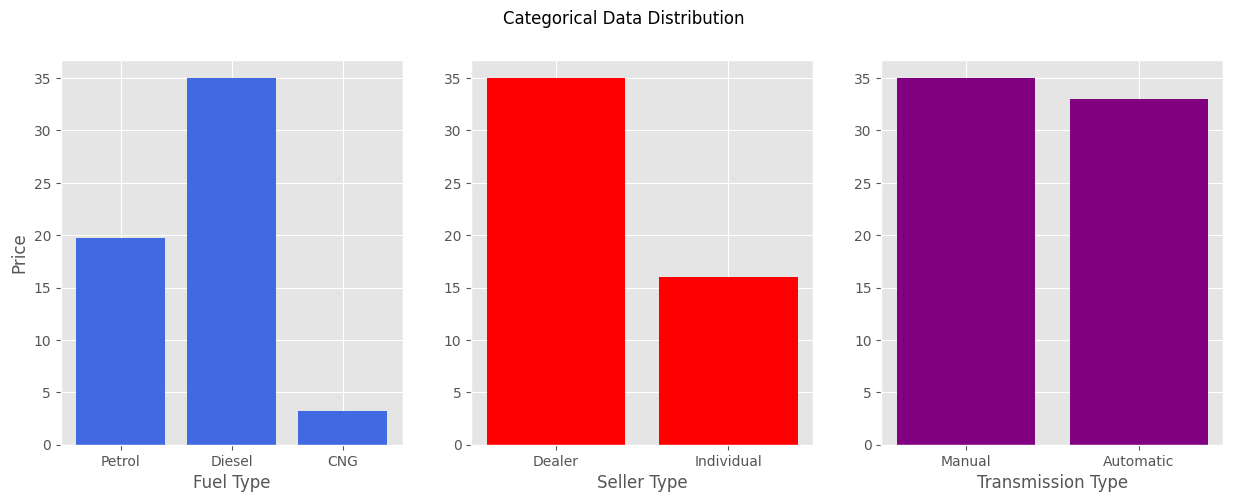

In [10]:
# Plot categorical data
plt.style.use('ggplot')
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Categorical Data Distribution')
axes[0].bar(fuel, price, color='royalblue')
axes[0].set_xlabel("Fuel Type")
axes[0].set_ylabel("Price")
axes[1].bar(seller, price, color='red')
axes[1].set_xlabel("Seller Type")
axes[2].bar(transmission, price, color='purple')
axes[2].set_xlabel("Transmission Type")
plt.show()


<Axes: xlabel='Transmission', ylabel='Selling_Price'>

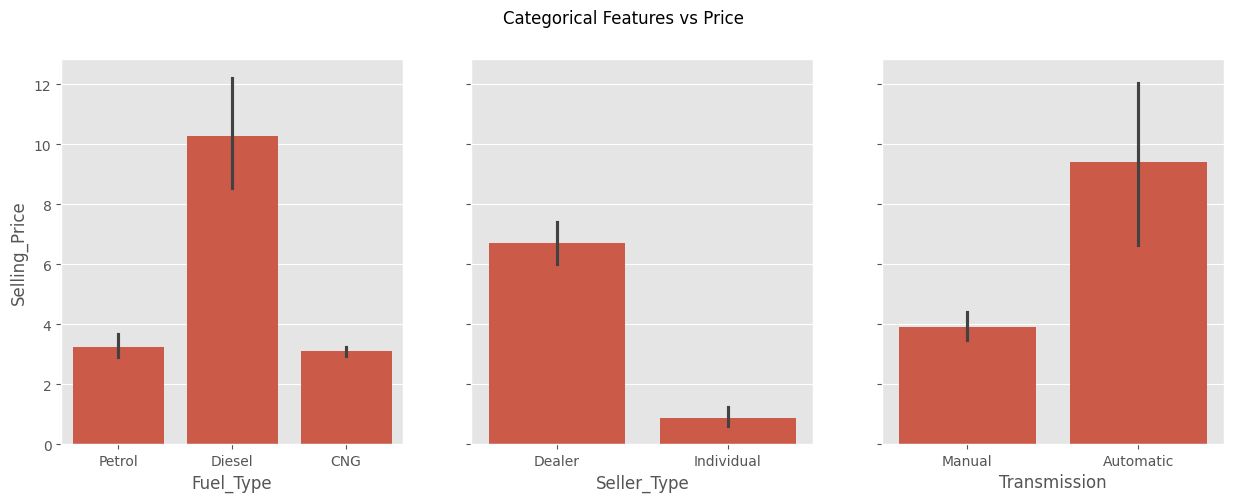

In [11]:
# Visualizing with seaborn
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Categorical Features vs Price')
sns.barplot(x=fuel, y=price, ax=axes[0])
sns.barplot(x=seller, y=price, ax=axes[1])
sns.barplot(x=transmission, y=price, ax=axes[2])


In [14]:
# Grouping data
petrol_cars = df[df['Fuel_Type'] == 'Petrol']
dealer_sellers = df[df['Seller_Type'] == 'Dealer']


In [15]:
# Encoding categorical variables
encoding_map = {'Petrol': 0, 'Diesel': 1, 'CNG': 2}
df['Fuel_Type'] = df['Fuel_Type'].map(encoding_map)
df = pd.get_dummies(df, columns=['Seller_Type', 'Transmission'], drop_first=True)


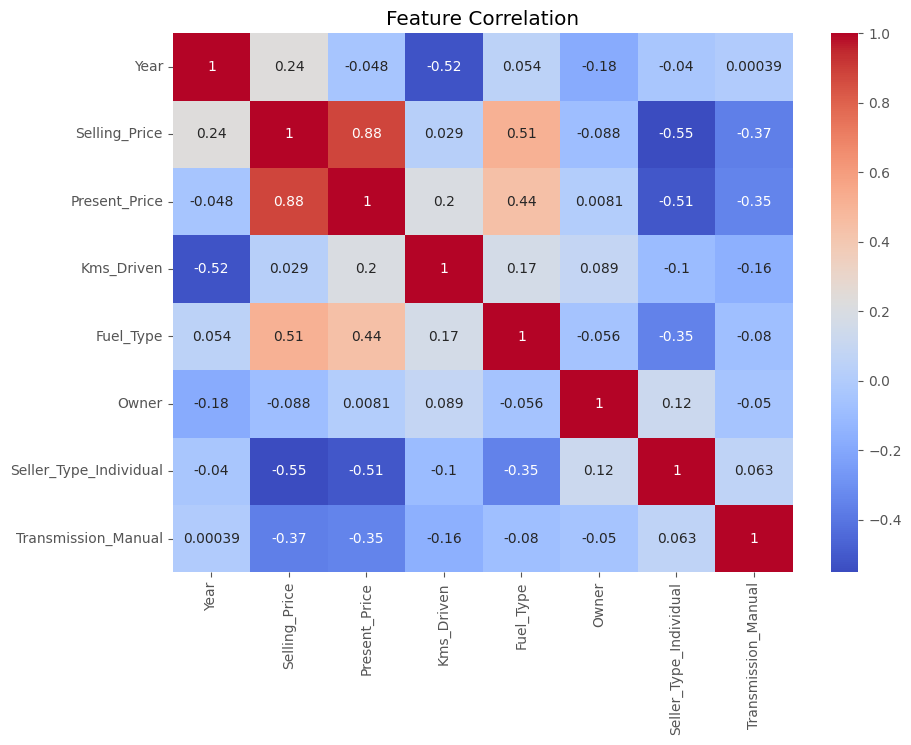

In [17]:
# Correlation heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.drop('Car_Name', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

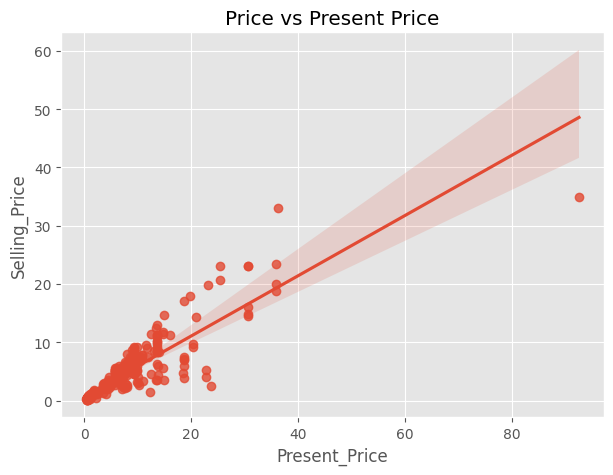

In [20]:
# Scatter plot for regression
plt.figure(figsize=(7,5))
plt.title('Price vs Present Price')
sns.regplot(x='Present_Price', y='Selling_Price', data=df)
plt.show()

In [22]:
# Splitting data into training and test sets
X = df.drop(['Car_Name', 'Selling_Price'], axis=1)
y = df['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [23]:
# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [24]:
# Model training
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)


In [25]:
# Model evaluation
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
r2 = metrics.r2_score(y_test, predictions)


In [26]:
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)


Mean Absolute Error:  1.258140470647337
Mean Squared Error:  3.493286026225147
R2 Score:  0.8773175030338536


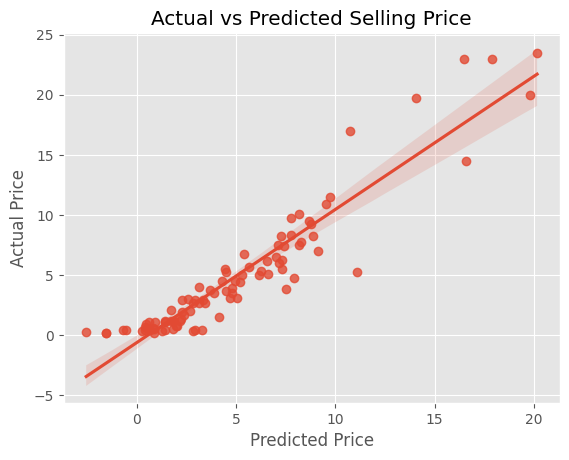

In [27]:
# Actual vs Predicted values
sns.regplot(x=predictions, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Actual vs Predicted Selling Price")
plt.show()